In [1]:
from sklearn.datasets import make_regression
import numpy as np

In [3]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1, n_targets=1,noise=80,random_state=13)

In [4]:
import matplotlib.pyplot as plt

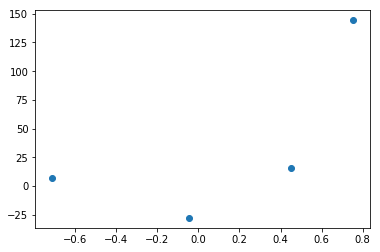

In [6]:
plt.scatter(X,y)

In [8]:
#apply ols 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [9]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
reg.coef_ #value of m 

array([78.35063668])

In [11]:
reg.intercept_ #value of b 

26.15963284313262

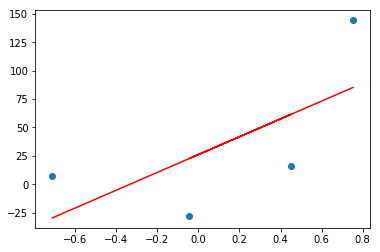

In [14]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [15]:
#lets apply gradient descent considering the slope is constant m=78.35
#lets assume gradient descend starts with intercept b=0 i.e. a random value  
y_pred = ((78.35 * X) + 100).reshape(4) #gradient descnt starting equation


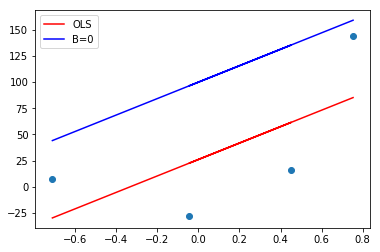

In [17]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='blue',label='B=0') v
plt.legend()
plt.show()

In [20]:
#now we need to find the value for b new, which is bnew=b old-alpha*slope. we need to find the slope at b-old. 
#formula is 
m=reg.coef_
b=0
loss_slope=-2*np.sum(y-m*X.ravel()-b)
loss_slope

-209.27706274506096

In [22]:
#lets take learning rate as 0.01 and calculate step size i.e slope*learning rate 
lr=0.1
step_size=loss_slope*lr

In [23]:
step_size

-20.927706274506097

In [25]:
#now we calc bnew, the new intercept
bnew=b-step_size
bnew

20.927706274506097

In [42]:
#now we use the new intercept to make pred
y_pred1 = ((78.35 * X) + bnew).reshape(4)


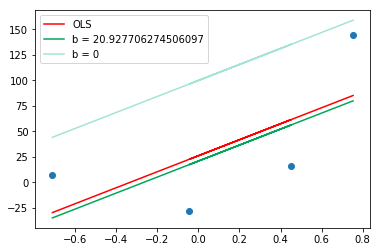

In [44]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(bnew))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()
     

In [36]:
#iteration 2
loss_slope=-2*np.sum(y-m*X.ravel()-bnew)
print(loss_slope)
step_size=lr*loss_slope
print(step_size)

-41.855412549012215
-4.185541254901222


In [53]:
bnew_new=bnew-step_size
print(bnew_new) #this value is coming close to the actual value i.e reg.intercept_
print(reg.intercept_) #this value is the actual value
#now we use the new intercept to make pred
y_pred2 = ((78.35 * X) + bnew_new).reshape(4)


24.44356092862312
26.15963284313262


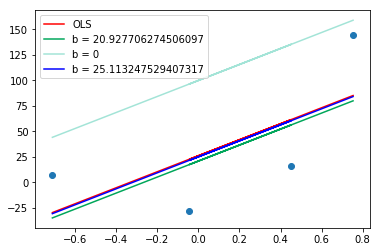

In [47]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(bnew))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.plot(X,y_pred2,color='blue',label='b = {}'.format(bnew_new))

plt.legend()
plt.show()
#almost overlapping
     

In [51]:
##iteration 3 
#find new slope at bnewnew
loss_slope=-2*np.sum(y-m*X.ravel()-bnew_new)
step_size=lr*loss_slope
bnew_new_new=bnew_new-step_size
print(bnew_new_new) #this value is coming close to the actual value i.e reg.intercept_
reg.intercept_ #this value is the actual value
#now we use the new intercept to make pred
y_pred3 = ((78.35 * X) + bnew_new_new).reshape(4)


25.280669179603365


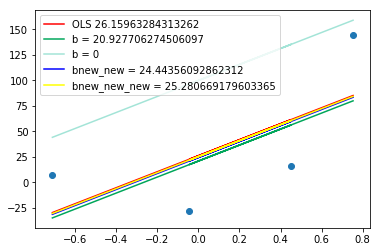

In [58]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label=f'OLS {reg.intercept_}')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(bnew))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.plot(X,y_pred2,color='blue',label='bnew_new = {}'.format(bnew_new))
plt.plot(X,y_pred3,color='yellow',label='bnew_new_new = {}'.format(bnew_new_new))

plt.legend()
plt.show()
#almost overlapping
     

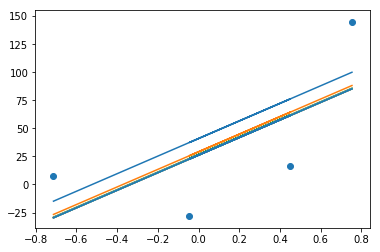

In [62]:
##making a loop for the same
b=100
m=reg.coef_
epochs=10
lr=0.1
for i in range(0,epochs+1):
    #we want to find the bnew. bnew=bold-learning rate*slope. we have to find the slope at b-old 
    loss_slope=-2*np.sum(y-m*X.ravel()-b) #slope of bold 
    loss_slope
    step_size=lr*loss_slope
    b=b-step_size #bnw=bold-lr*slope
    y_pred = ((m * X) + b)
    plt.plot(X,y_pred)
plt.scatter(X,y)

    
    
    
    

In [74]:
##writing a class for Gradient descend LR
#we will first implement the logic to calculate theintercept when the coefficient is known-this is only half the GD Regressor  
class GDRegressor():
    def __init__(self,lr,epochs):
        self.b=-120
        self.m=reg.coef_
        self.epochs=epochs
        self.lr=lr
    
    def fit(self,X,y):
        for i in range(epochs):
            loss_slope=-2*np.sum(y-self.m*X.ravel()-self.b) #slope of bold 
            step_size=self.lr*loss_slope
            self.b=self.b-step_size
            y_pred=(self.m*X)+self.b
        print(self.b)

        

In [75]:
gd=GDRegressor(0.1,10)
gd.fit(X,y)

26.159617876386218


In [76]:
reg.intercept_ #same intercept 

26.15963284313262

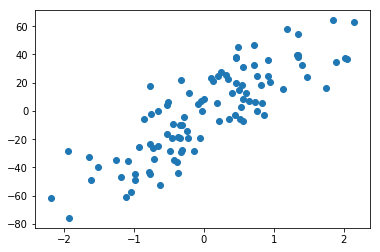

In [124]:
##now we code fr finding both m and b
from sklearn.model_selection import cross_val_score
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)


In [125]:
reg=LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


In [126]:
np.mean(cross_val_score(reg,X,y,scoring='r2',cv=10)) #our rs

0.6375011587464419

In [127]:
#from scratch for m and b 
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [131]:
gd = GDRegressor(0.001,100)
gd.fit(X,y)
gd.predict(X)

27.828091872608653 -2.2947448944994893


array([[-22.11921769],
       [-14.45967436],
       [-14.92180785],
       [ 24.22071289],
       [  4.32438488],
       [ 21.67112435],
       [ -9.06605019],
       [  2.851948  ],
       [-22.35879005],
       [-14.25796038],
       [ 53.78500537],
       [  8.75972323],
       [  3.48793408],
       [ -8.76271341],
       [-23.68416824],
       [ 10.31579463],
       [ 15.5120051 ],
       [  7.71035286],
       [-47.24011768],
       [ 46.38331635],
       [-24.25080397],
       [-16.54175657],
       [-28.12854285],
       [ 57.54630988],
       [ -8.06489135],
       [-47.90758693],
       [-11.71784478],
       [-11.25883162],
       [-15.69039288],
       [-16.85340673],
       [ 17.79616505],
       [ 19.01909815],
       [ 10.32476716],
       [-37.40283105],
       [-63.15798965],
       [-35.28268842],
       [  3.75651986],
       [ 34.72543668],
       [-32.54893408],
       [ 13.35192552],
       [-44.39433775],
       [ -2.36122692],
       [-10.03469777],
       [ 10